In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.svm as svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp
import itertools

# Polynomial Kernel SVM


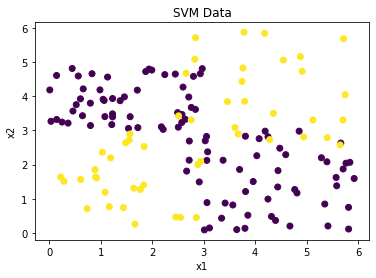

In [2]:
# Load data
df = np.genfromtxt('svm_data_3.csv', delimiter=',')
features = df[:,0:2]
labels = df[:,2]

# Visualize data
plt.scatter(features[:,0], features[:,1], c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Data')
plt.show()

In [3]:
# Create paramets for model selection
Cs = [0.5, 0.8, 1.0, 2.0, 5.0]
degrees = [1, 2, 3, 4]
gammas = ['scale', 'auto']
coef0s = [-2.0, -1.0, 0.0, 1.0, 2.0]
params = list(itertools.product(Cs, degrees, gammas, coef0s))

# Split into training/val/test sets
seed = 69
F_train_val, F_test, L_train_val, L_test = train_test_split(features,
                                                            labels,
                                                            test_size=0.2,
                                                            random_state=seed)
F_train, F_val, L_train, L_val = train_test_split(F_train_val,
                                                  L_train_val,
                                                  test_size=0.2,
                                                  random_state=seed)
# Model Selection
accs = []
for C, degree, gamma, coef0 in params:
    SVM = svm.SVC(kernel='poly', C=C, degree=degree, gamma=gamma, coef0=coef0)
    SVM.fit(F_train, L_train)
    # Determine trained model accuracy
    L_pred = [SVM.predict(f.reshape(1,-1)) for f in F_val]
    accs.append(accuracy_score(L_val, L_pred)) # Only using one fold so accuracy = accuracy of whole dataset
    
# Determine best model
best_idx = accs.index(max(accs))
C_best, degree_best, gamma_best, coef0_best = params[best_idx]

# Train best model
SVM = svm.SVC(kernel='poly', C=C_best, degree=degree_best, gamma=gamma_best, coef0=coef0_best)
SVM.fit(F_train, L_train)

# Predict on test data
L_pred = [SVM.predict(f.reshape(1,-1)) for f in F_test]
best_acc = accuracy_score(L_test, L_pred)

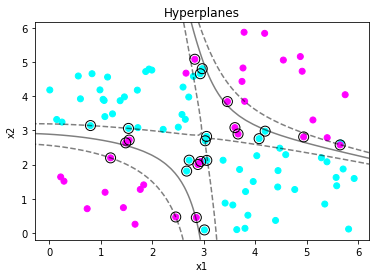

In [5]:
# Display Plot

# Training Data
plt.scatter(F_train[:,0], F_train[:,1], c=L_train, cmap='cool')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('training Data')

# Determine support Vectors
decision_function = SVM.decision_function(F_train)
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = F_train[support_vector_indices]

# Training Data
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
Z = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hyperplanes')
plt.show()

# Boosting algorithm


### Load and preprocess data

In [6]:
# load and prepare data
dataset = pd.read_csv('sonar.all-data',header=None)
X = dataset.iloc[:,:-1].to_numpy()
# Labels should be -1 and 1!
y = (dataset.iloc[:,-1].to_numpy()=='M').astype(int)
y = np.where(y==0, -np.ones_like(y), y)
print("Number of samples: ", X.shape[0])
print('Number of features: ', X.shape[-1])
print(X)
print(y)

Number of samples:  208
Number of features:  60
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


### Boosting train and predict functions


**Note 1 **: 

in scikit-learn, all supervised estimators implement a ``fit(X, y)`` method and a ``predict(X)`` method with ``X`` being unlabeled observations and  ``y`` being labels. 

Therefore ``Classifier`` parameter can be any sklearn class implementing a supervised classifier.

(See *The problem solved in supervised learning* section in the supervised learning tutorial from [sklearn documentation](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

**Note 2 **: 

Some sklearn classifiers (such as [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), etc.)  have a ``sample_weight`` parameters in their ``fit`` and ``score`` methods, making it easy to implement a user-defined boosting algorithm. 

In [ ]:
def boosting_train(
    X_train, 
    y_train, 
    n_clfs,           # number of classifier
    Classifier,       # Python class of classifier
    clfs_args = {},   # Specific python class of classifier's arguments
):
    """
    Adaboost training algorithm
    """
    clfs = []
    alphas = []

    n = len(X_train) 
    # Initialize weights to 1/n
    weights = [1/n for _ in n] #TODO!
    for t in range(n_clfs):
        # -------------------------
        # Train a new classifier
        # -------------------------
        clf = Classifier(**clfs_args)
        # Train a weak learner using the training data and the sample weights
        clf.fit(X_train, y_train, sample_weights=weights) #TODO!
        clfs.append(clf)
        # Compute weighted training error 
        e_t = clf.score(X_train, y_train, sample_weights=weights) #TODO!
        # Compute alpha_t (and avoid math errors)
        alpha_t = log((1-e_t)/e_t) #TODO!
        alphas.append(alpha_t)
        # -------------------------
        # Update weights
        # -------------------------
        y_pred = clf.predict(X_train)
        idxs = np.where(np.not_equal(y_train, y_pred))
        for idx in idxs:
            weights[idx] = weights[idx] * alpha_t

    # Return the list of trained classifiers composing the boosting classifier
    # with their corresponding weights 'alphas'
    return(clfs, alphas)

def boosting_predict(
    clfs,       # list of classifiers composing the boosting classifier
    alphas,     # Weights associated with each classifier in 'clfs'
    X_test,
):
    """
    Adaboost predict algorithm
    """
    # all_preds = []
    # for clf in clfs:
    #     all_preds.append(clf.predict(X_test))
    #     # print(clf.predict(X_test))
    # all_preds = np.array(all_preds)
    # y_pred = stats.mode(all_preds)[0][0]
    probas = [clf.predict_proba(X) for clf in clfs]
    avg = np.average(self.probas_, axis=0, weights=self.weights)
    return(y_pred)

### Cross validation


You can use the [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) from sklearn to split your datasets into k folds. 

In [ ]:
def KFold_split(X, y, num_folds, seed=int(666)):
    """
    Split 'X' and 'y' into k-folds with k='num_fold'
    """
    KFold_splitter = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    # Initialize lists of X (train/val) and y (train/val) for each fold
    X_train_folds = []  
    X_val_folds = []
    y_train_folds = []
    y_val_folds = []
    for (kth_fold_train_idxs, kth_fold_val_idxs) in KFold_splitter.split(X, y):
        X_train_folds.append(X[kth_fold_train_idxs])
        X_val_folds.append(X[kth_fold_val_idxs])
        y_train_folds.append(y[kth_fold_train_idxs])
        y_val_folds.append(y[kth_fold_val_idxs])
    # Return the list of k-folds datasets
    return X_train_folds, X_val_folds, y_train_folds, y_val_folds

In [ ]:
def evaluate_boosting(
    X_train_val, 
    y_train_val, 
    num_folds, 
    n_clfs,                                    # number of classifier
    Classifier = DecisionTreeClassifier,       # Python class of classifier
    clfs_args = {"max_depth" : 1},             # Specific python class of classifier's arguments
    seed=int(666),
):
    """
    Perform a cross validation of the boosting algorithm
    """
    ... #TODO!
    return boosting_clfs, boosting_alphas, boosting_scores

### Test boosting on the sonar dataset


In [ ]:
num_folds = 5
# Extract a test set:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=42)


# For each hyper-parameter instance, do KFold cross validation:
for n_clfs in [1, 10, 50, 100, 200, 300, 400]:
    boosting_clfs, boosting_alphas, boosting_scores = evaluate_boosting(...)#TODO!
    print('Trees: %d' % n_clfs)
    print('Validation scores: ', [round(s, 3) for s in boosting_scores])
    print('Mean validation accuracy: %.3f' % (sum(boosting_scores)/len(boosting_scores)))
    # Test accuracy computed with the boosting classifier trained with the first k-fold
    test_acc = accuracy_score(
        boosting_predict(boosting_clfs[0], boosting_alphas[0], X_test),
        y_test,
    )
    print('Test set accuracy: %.3f' %test_acc)